# Income Estimation Model 

In [1]:
import numpy as np # For data manipulation
import pandas as pd # For data representation
import matplotlib.pyplot as plt # For basic visualization
import seaborn as sns  # For synthetic visualization
from sklearn.naive_bayes import GaussianNB # Gaussian Naive bayes classification model
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.metrics import accuracy_score # For checking the accuracy of the model
#lets start modeling 
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.model_selection import GridSearchCV
from scipy import stats
import pandas_profiling

C:\Users\hani\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use(BACKEND)


# Load Data

In [2]:
#read two data for  players and salary
df = pd.read_csv('D:/bank/NBA_season1718_salary.csv')
df2 = pd.read_csv('D:/bank/Seasons_Stats.csv')

In [3]:
df.head()

Unnamed: 0          Player   Tm  season17_18
0           1   Stephen Curry  GSW   34682550.0
1           2    LeBron James  CLE   33285709.0
2           3    Paul Millsap  DEN   31269231.0
3           4  Gordon Hayward  BOS   29727900.0
4           5   Blake Griffin  DET   29512900.0

In [4]:
df2.head()

Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN   

   ...      FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  ...    0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  ...    0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  ...    0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3  ...    0.559  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4  ...    0.548  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0  

[5 rows x 53 columns]

In [5]:
# we need to mearge the data based on names and do some analysis 

In [6]:
#merge df and df2 based on player 
df3 = pd.merge(df,
                 df2,
                 on='Player')
df3.head()

Unnamed: 0_x         Player Tm_x  season17_18  Unnamed: 0_y    Year Pos  \
0             1  Stephen Curry  GSW   34682550.0         20042  2010.0  PG   
1             1  Stephen Curry  GSW   34682550.0         20654  2011.0  PG   
2             1  Stephen Curry  GSW   34682550.0         21236  2012.0  PG   
3             1  Stephen Curry  GSW   34682550.0         21798  2013.0  PG   
4             1  Stephen Curry  GSW   34682550.0         22402  2014.0  PG   

    Age Tm_y     G   ...      FT%   ORB    DRB    TRB    AST    STL   BLK  \
0  21.0  GSW  80.0   ...    0.885  48.0  308.0  356.0  472.0  152.0  19.0   
1  22.0  GSW  74.0   ...    0.934  52.0  234.0  286.0  432.0  109.0  20.0   
2  23.0  GSW  26.0   ...    0.809  15.0   73.0   88.0  138.0   39.0   8.0   
3  24.0  GSW  78.0   ...    0.900  59.0  255.0  314.0  539.0  126.0  12.0   
4  25.0  GSW  78.0   ...    0.885  46.0  288.0  334.0  666.0  128.0  14.0   

     TOV     PF     PTS  
0  243.0  252.0  1399.0  
1  226.0  233.0  1373.0  
2   65.0   62.0   383.0  
3  240.0  198.0  1786.0  
4  294.0  194.0  1873.0  

[5 rows x 56 columns]

In [7]:
#check if there is any missing values 
df3.isnull().sum() 

Unnamed: 0_x       0
Player             0
Tm_x               0
season17_18        0
Unnamed: 0_y       0
Year               0
Pos                0
Age                0
Tm_y               0
G                  0
GS                 8
MP                 0
PER                0
TS%                6
3PAr              11
FTr                6
ORB%               0
DRB%               0
TRB%               0
AST%               0
STL%               0
BLK%               0
TOV%               6
USG%               1
blanl           3314
OWS                0
DWS                0
WS                 0
WS/48              0
blank2          3314
OBPM               0
DBPM               0
BPM                0
VORP               0
FG                 0
FGA                0
FG%                6
3P                 5
3PA                5
3P%              259
2P                 0
2PA                0
2P%               13
eFG%               6
FT                 0
FTA                0
FT%               51
ORB          

In [8]:
#replace missing values with mean. 
df3 = df3.fillna(df2.mean())

In [9]:
#check again the missing values 
df3.isnull().sum() 

Unnamed: 0_x       0
Player             0
Tm_x               0
season17_18        0
Unnamed: 0_y       0
Year               0
Pos                0
Age                0
Tm_y               0
G                  0
GS                 0
MP                 0
PER                0
TS%                0
3PAr               0
FTr                0
ORB%               0
DRB%               0
TRB%               0
AST%               0
STL%               0
BLK%               0
TOV%               0
USG%               0
blanl           3314
OWS                0
DWS                0
WS                 0
WS/48              0
blank2          3314
OBPM               0
DBPM               0
BPM                0
VORP               0
FG                 0
FGA                0
FG%                0
3P                 0
3PA                0
3P%                0
2P                 0
2PA                0
2P%                0
eFG%               0
FT                 0
FTA                0
FT%                0
ORB          

In [10]:
# we need to remove the Unnamed  from the dataset
df3 = df3.drop(["Unnamed: 0_x", "Unnamed: 0_y"], axis=1)

In [11]:
#since there are a huge missing values for blanl and blank2 its better to drop them            
df3 = df3.dropna(axis=1)

In [12]:
#copy the dataframe 
df = df3.copy()

# Data Analysis 

In [13]:
df.describe()

season17_18         Year          Age            G           GS  \
count  3.314000e+03  3314.000000  3314.000000  3314.000000  3314.000000   
mean   7.891758e+06  2012.369644    25.438141    57.088413    32.514408   
std    7.861332e+06     5.319839     3.792291    23.328331    30.126138   
min    1.722400e+04  1977.000000    18.000000     1.000000     0.000000   
25%    2.000000e+06  2011.000000    23.000000    41.000000     3.000000   
50%    5.000000e+06  2014.000000    25.000000    65.000000    23.000000   
75%    1.230769e+07  2016.000000    28.000000    77.000000    63.000000   
max    3.468255e+07  2017.000000    40.000000    83.000000    82.000000   

                MP          PER          TS%         3PAr          FTr  \
count  3314.000000  3314.000000  3314.000000  3314.000000  3314.000000   
mean   1487.820157    14.659505     0.533151     0.254569     0.289845   
std     881.165203     6.420401     0.069648     0.197575     0.158205   
min       1.000000   -54.400000     0.000000     0.000000     0.000000   
25%     723.250000    11.600000     0.506000     0.059250     0.191000   
50%    1511.500000    14.400000     0.537000     0.255000     0.267000   
75%    2205.500000    17.400000     0.567000     0.396000     0.363000   
max    3388.000000   129.100000     1.000000     1.000000     2.000000   

          ...               FT%          ORB          DRB          TRB  \
count     ...       3314.000000  3314.000000  3314.000000  3314.000000   
mean      ...          0.749012    64.270670   192.214846   256.485516   
std       ...          0.119243    64.848665   149.321335   206.352707   
min       ...          0.000000     0.000000     0.000000     0.000000   
25%       ...          0.697000    18.250000    80.000000   105.000000   
50%       ...          0.769000    42.000000   164.500000   210.000000   
75%       ...          0.825000    90.000000   262.000000   352.000000   
max       ...          1.000000   440.000000   882.000000  1226.000000   

               AST          STL          BLK          TOV           PF  \
count  3314.000000  3314.000000  3314.000000  3314.000000  3314.000000   
mean    147.010863    48.512975    29.434520    89.507827   119.778515   
std     147.461471    36.165506    36.737344    67.206316    68.344870   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      42.000000    20.000000     6.000000    37.000000    65.000000   
50%      99.000000    42.000000    17.000000    76.000000   122.000000   
75%     206.000000    69.000000    38.000000   131.000000   170.000000   
max     925.000000   217.000000   269.000000   464.000000   332.000000   

               PTS  
count  3314.000000  
mean    661.930597  
std     497.912092  
min       0.000000  
25%     256.000000  
50%     573.000000  
75%     974.500000  
max    2593.000000  

[8 rows x 48 columns]

In [14]:
pandas_profiling.ProfileReport(df)

In [15]:
#lets see the distubution of the salary 

C:\Users\hani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


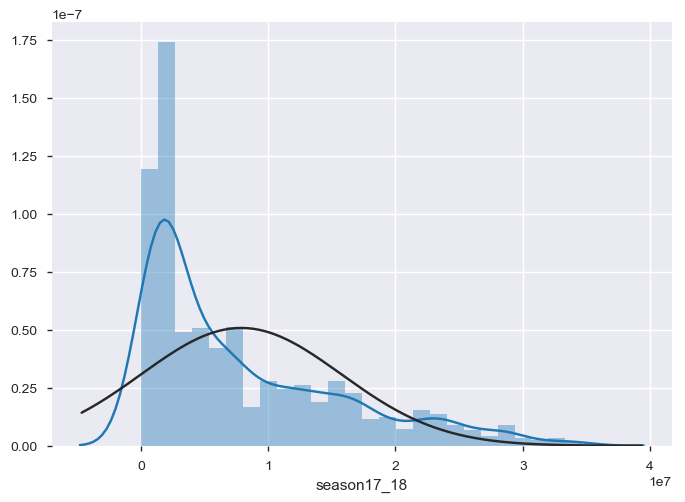

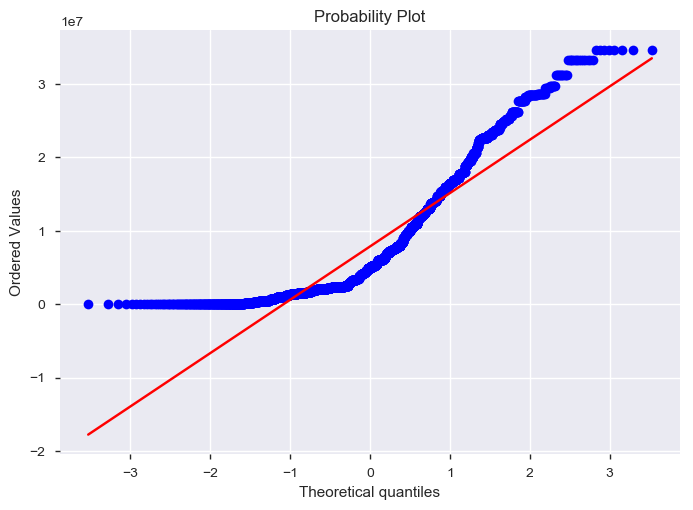

In [16]:
#histogram and normal probability plot
from scipy.stats import norm
sns.distplot(df['season17_18'],fit=norm);
fig = plt.figure()
res = stats.probplot(df['season17_18'], plot=plt)

In [17]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 100]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [18]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [19]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

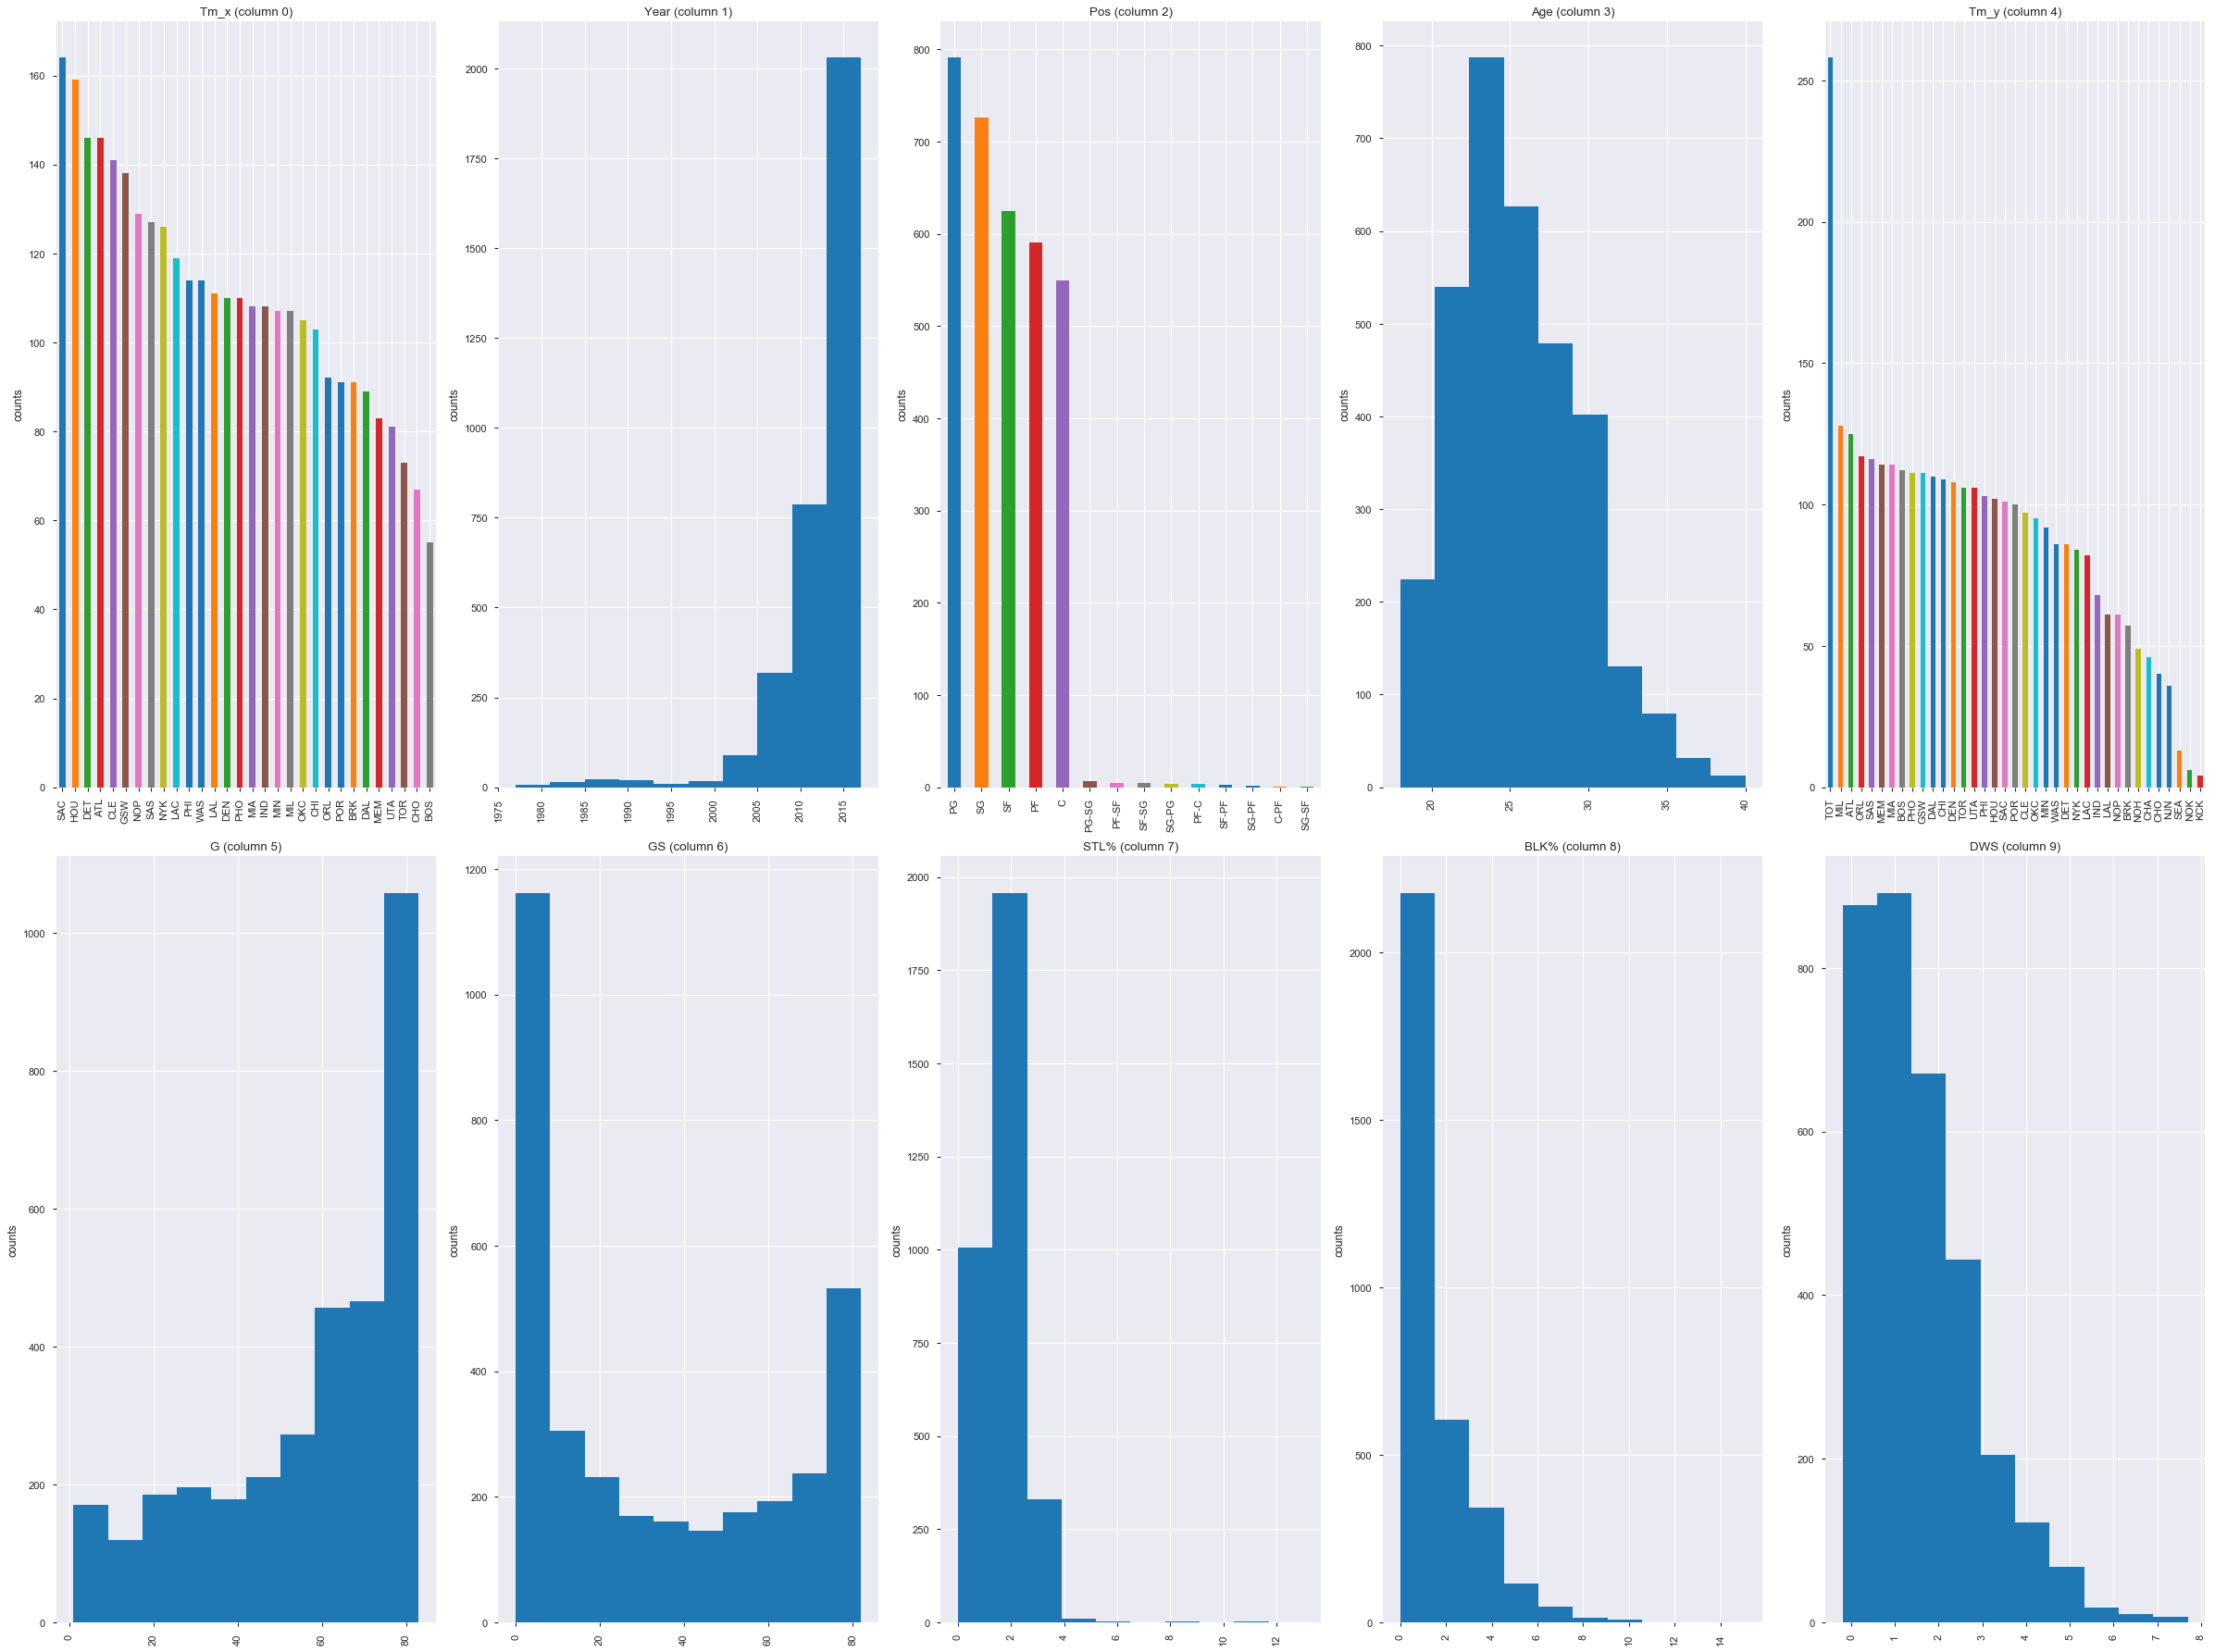

In [20]:
plotPerColumnDistribution(df, 10, 5)


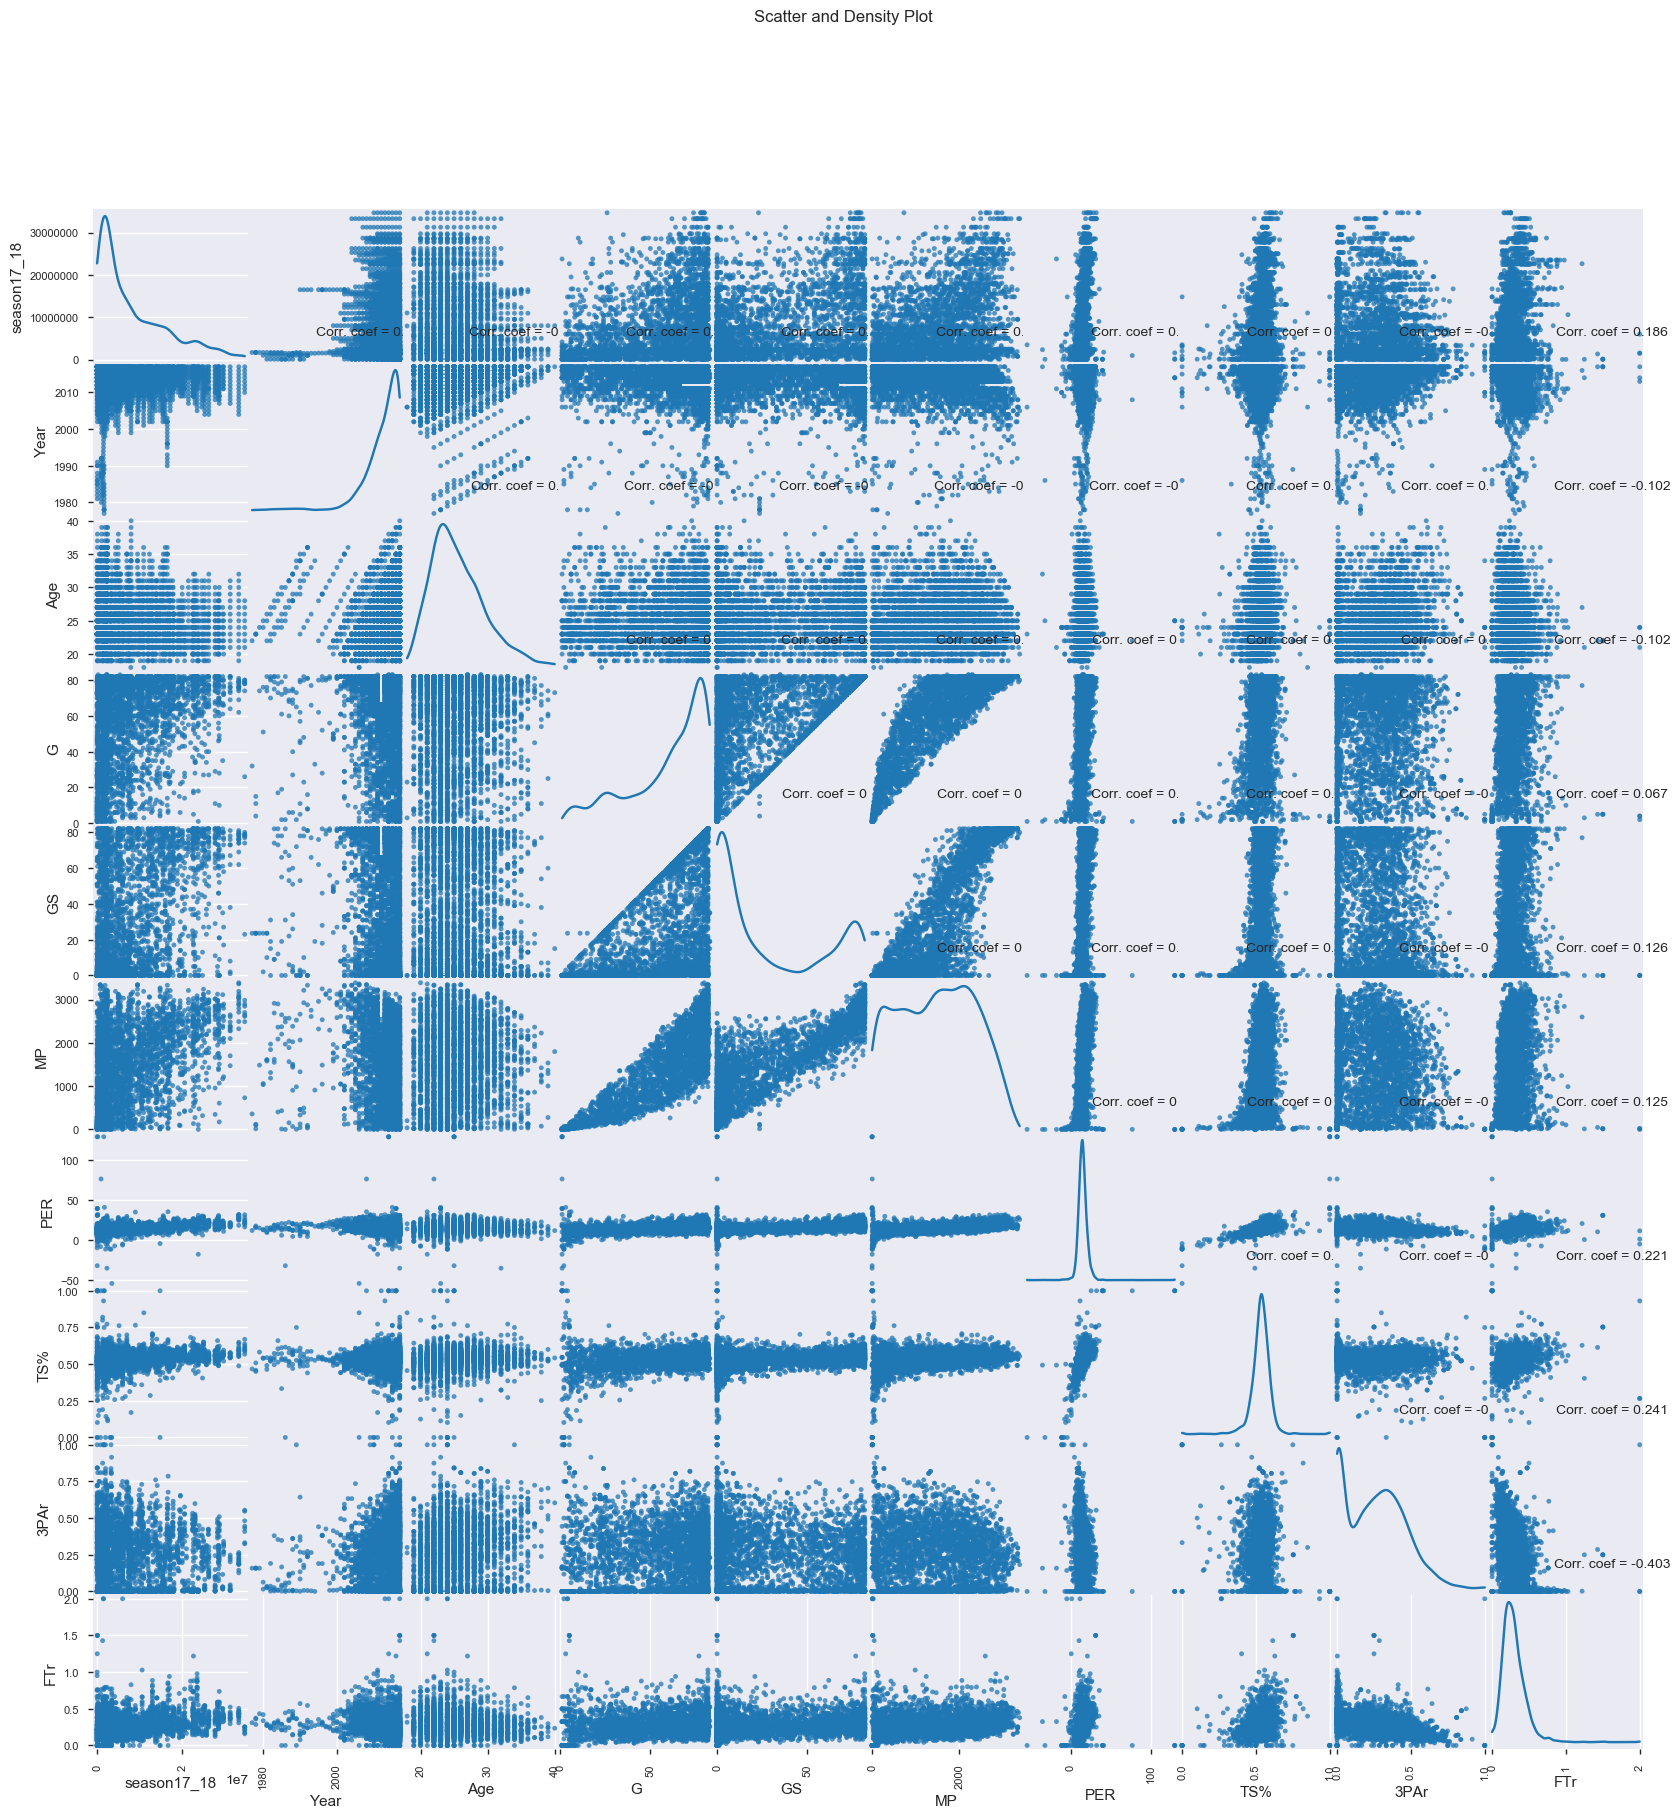

In [21]:
plotScatterMatrix(df, 20, 10)


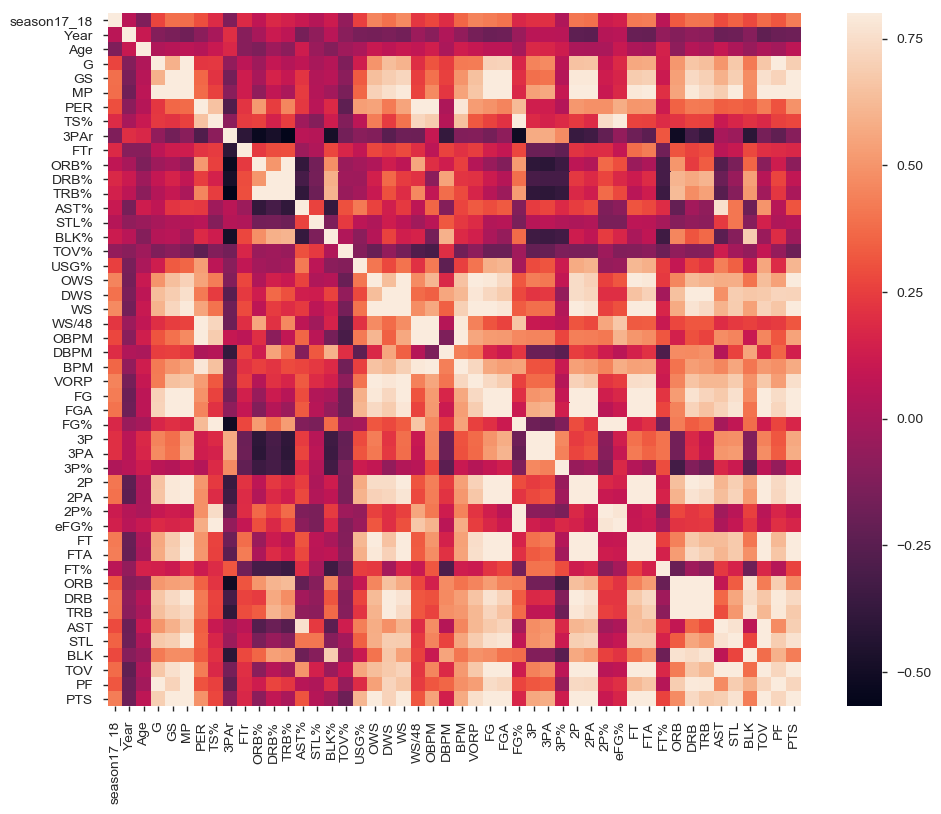

In [22]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat =df.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#replace all the categorical feautres with dummy varibles.

In [23]:
# function to obtain Categorical Features
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# function to factorize categorical features
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# function to create dummy variables of categorical features
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 


# get categorical features
data_cats = _get_categorical_features(df)



# create additional dummy features - 
data = _get_dummies(df, data_cats)

# factorize the categorical features from train and test data
data = _factorize_categoricals(df, data_cats)

# Split the data into training and testing 

In [24]:
#Creating the X and y variables
X = data.drop('season17_18',  1).values
y = data["season17_18"].values
#Spliting X and y into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1234)

# Linear Regression Model 

In [25]:
#Train the model
from sklearn import linear_model
LR = linear_model.LinearRegression()

#Fit the model
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
#Score/Accuracy
print("Accuracy --> ", LR.score(X_test, y_test)*100)

Accuracy -->  78.3751912911109


In [27]:
#Prediction
print("Predict salary in $ " + str(LR.predict([X_test[15]])))
print("Real salary in $ " + str(y_test[15]))

Predict salary in $ [13301910.52199299]
Real salary in $ 13760000.0


In [28]:
predictions = LR.predict(X_test)

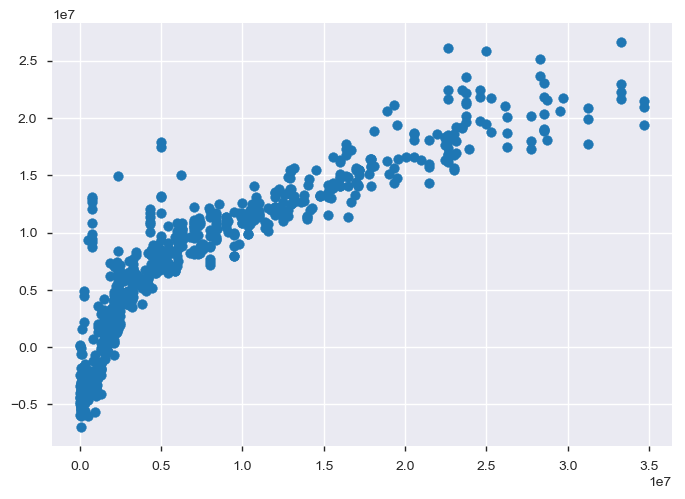

In [29]:
plt.scatter(y_test,predictions)


# Residual Histogram


C:\Users\hani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


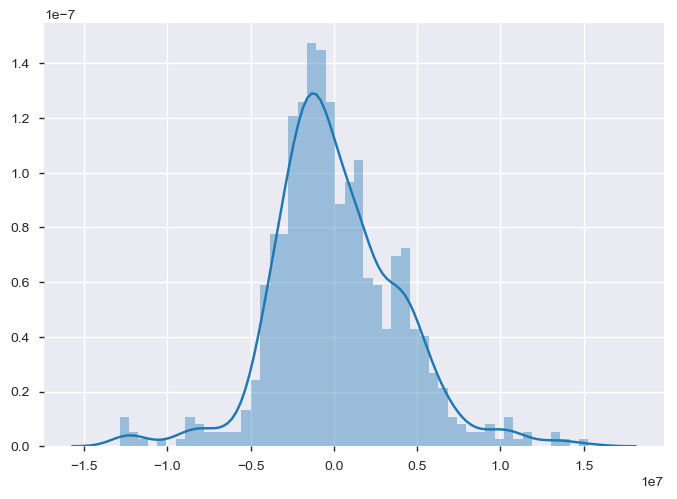

In [30]:
sns.distplot((y_test-predictions),bins=50);


# Summary: The accuracy of the Linear regression model is 78.37. Lets test other models. 

# RANDOM FOREST 

In [31]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=1000)
#Fit
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
#Score/Accuracy
print("Accuracy --> ", RF.score(X_test, y_test)*100)

Accuracy -->  99.69760876918534


In [33]:
#Prediction
print("Predict salary in $ " + str(RF.predict([X_test[15]])))
print("Real salary in $ " + str(y_test[15]))

Predict salary in $ [13759803.]
Real salary in $ 13760000.0


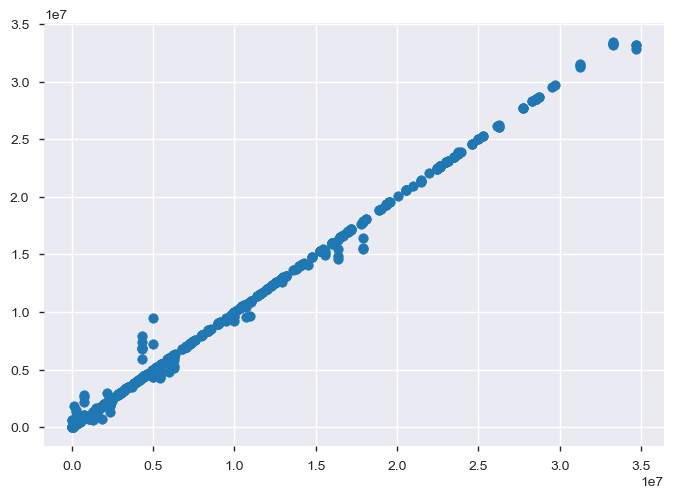

In [34]:
predictions = RF.predict(X_test)
plt.scatter(y_test,predictions)


# Residual Histogram


C:\Users\hani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


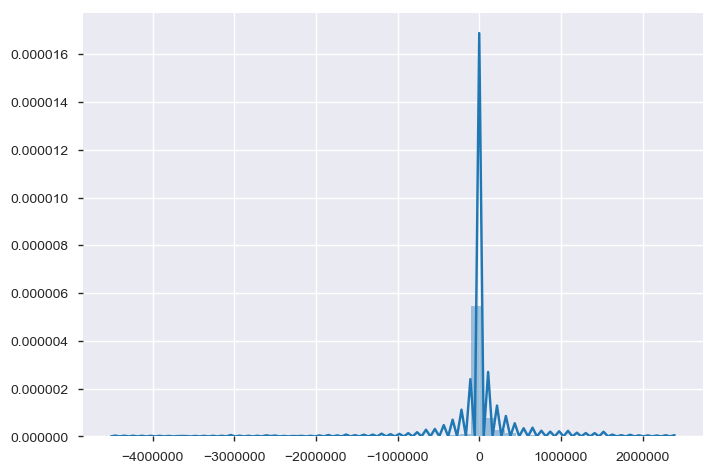

In [35]:
sns.distplot((y_test-predictions),bins=50);


#The performance of the random forest is pretty good. 99.6

# Gradient Boosting 

In [36]:
# Fit regression model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)


MSE: 466749928205.5052


In [37]:
print("Accuracy --> ", clf.score(X_test, y_test)*100)

Accuracy -->  99.2994519670571


In [38]:
#Prediction
print("Predict salary in $ " + str(clf.predict([X_test[15]])))
print("Real salary in $ " + str(y_test[15]))

Predict salary in $ [13702167.6580893]
Real salary in $ 13760000.0


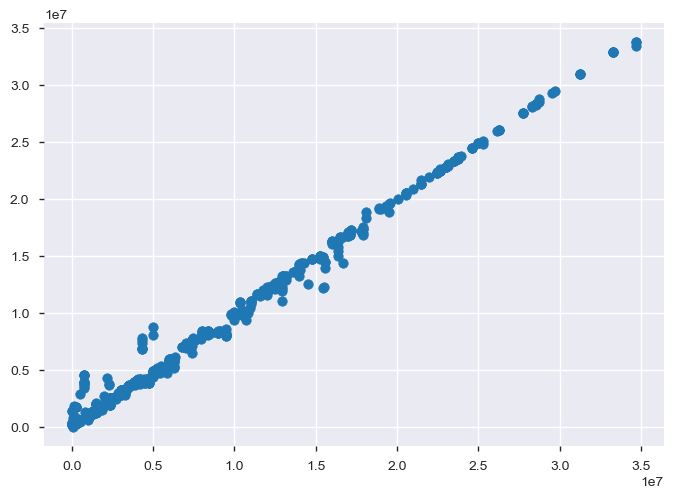

In [39]:
predictions = clf.predict(X_test)
plt.scatter(y_test,predictions)

# Residual Histogram


C:\Users\hani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


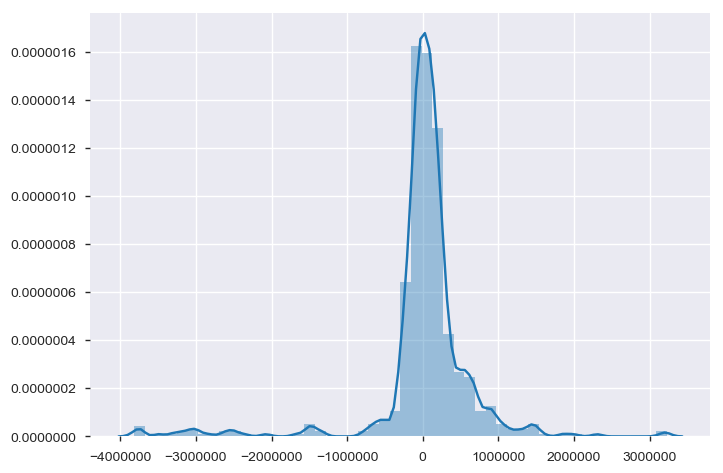

In [40]:
sns.distplot((y_test-predictions),bins=50);


# Conclusion: The performance of Random Forest Model scores 99.655% which is the best comparing to linear regression and Gradient Boosting